# Código CSS de 7 qubits - Corrección de errores pequeños en varios qubits:

En este notebook probamos el código de Steane de 7 qubits aplicando errores pequeños de un qubit en varios qubits. Es decir, vamos a aplicar un error:

$$E = E_1 \otimes E_2 \otimes \dots \otimes E_7$$

Donde los errors $E_i$ son pequeños. Por errores pequeños nos referimos a operadores unitarios con $E_i \approx I$. En este archivo vamos a mostrar casos con errores $\text{RXGate}(\alpha)$ con $\alpha$ pequeño (en la prueba 1) y $U(\theta, \phi, \lambda)$ con $\theta, \phi, \lambda$ pequeños (en la prueba 2).

Para crear los circuitos usamos la clase $\textcolor{Orange}{\text{SteaneCodeCircuit}}$

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
from qiskit.circuit.library.standard_gates import RXGate, UGate


import sys
import os

# Tenemos que agregar ".." a nuestro sys.path para usar SteaneCodeCircuit
sys.path.append(os.path.abspath(".."))
from objects.steane_code_circuit import SteaneCodeCircuit

### Prueba 1:

En la primer prueba usamos la compuerta $\textbf{RXGate}$. Para esto generamos un vector $[\alpha_1, \alpha_2, \dots, \alpha_7]$ con $|\alpha_i| < \textcolor{Orange}{\text{Max\_alpha}}$ y definimos $E_i = \text{RXGate}(\alpha_i)$. Luego corremos dos circuitos:

- Un circuito físico $\textcolor{Orange}{\text{qc\_error}}$ donde codificamos, introducimos el error $\text{RXGate}(\alpha_i)$ en cada qubit físico y medimos.
- Un circuito físico $\textcolor{Orange}{\text{qc\_corrected}}$ donde codificamos, introducimos el error $\text{RXGate}(\alpha_i)$ en cada qubit físico, aplicamos corrección de errores y medimos.

Para esta primera prueba usamos $\textcolor{Orange}{\text{Max\_alpha}} = 1$

In [2]:
# Definimos max_alpha y definimos el vector alpha_vector:
max_alpha = 0.5
alpha_vector = []

for i in range(7):
    alpha = np.random.uniform(-max_alpha, max_alpha)
    alpha_vector.append(alpha)

alpha_vector

[0.06521535576784954,
 0.21634456630624732,
 -0.2259274566831625,
 0.40962306499705337,
 0.27414814832137624,
 0.4510879628252773,
 0.20175650309030224]

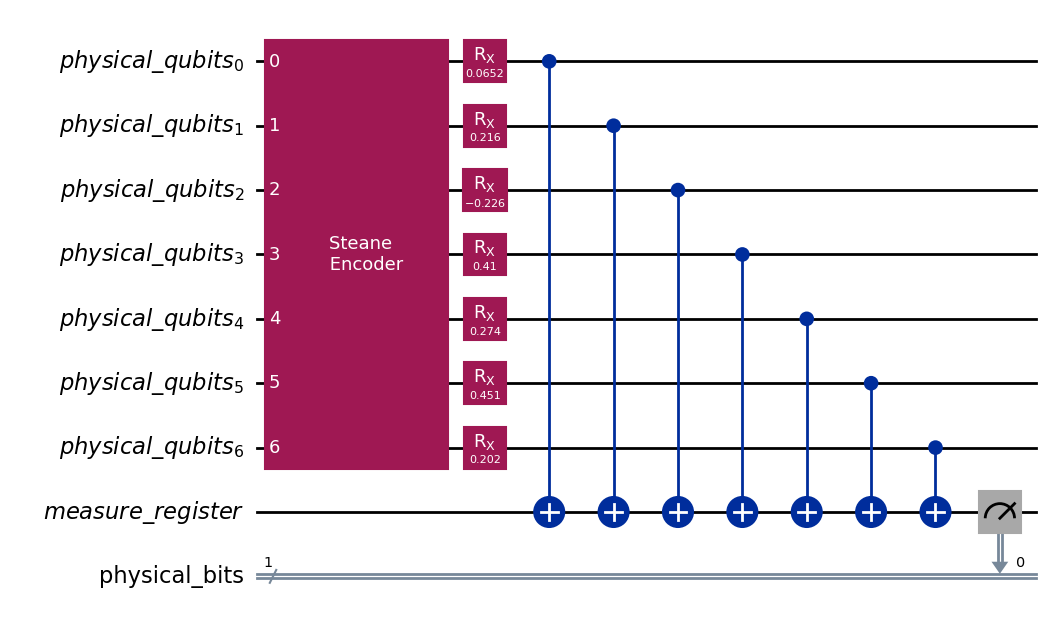

In [3]:
# Generamos el código sin corregir error
qc_error_steane_circuit = SteaneCodeCircuit(logical_qubit_count=1)
qc_error_steane_circuit.encode()

for i in range(qc_error_steane_circuit.physical_qubit_count):
    qc_error_steane_circuit.append_unitary_error(RXGate(alpha_vector[i]), i)

qc_error_steane_circuit.measure_all()
qc_error_steane_circuit.draw_physical_circuit()

In [4]:
qc_error = qc_error_steane_circuit.physical_quantum_circuit

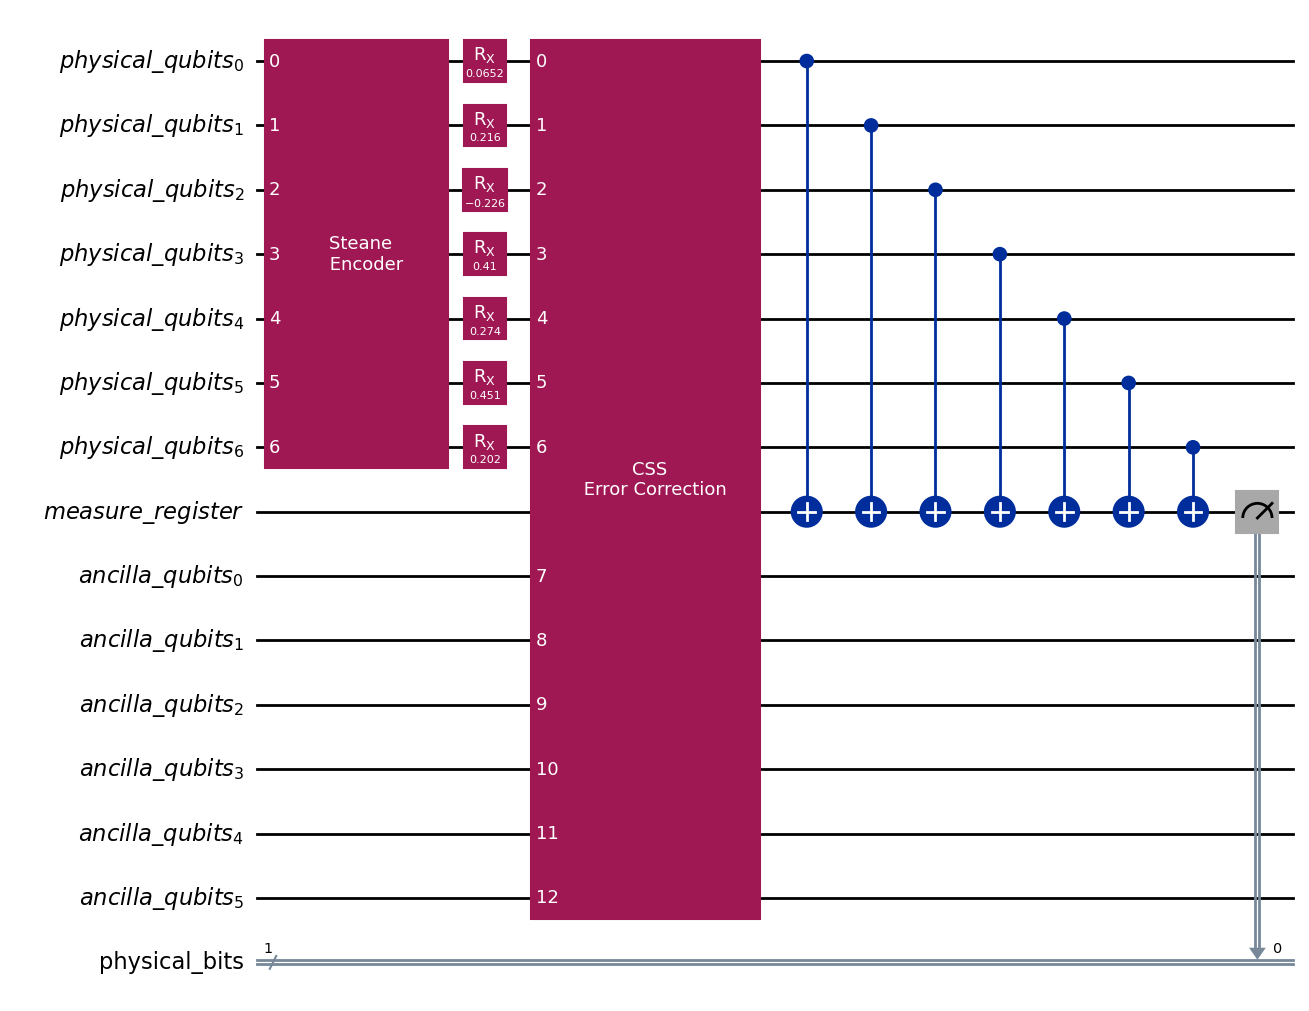

In [5]:
# Generamos el código sin corregir error y el código Lógico
qc_corrected_steane_code = SteaneCodeCircuit(logical_qubit_count=1)
qc_corrected_steane_code.encode()
for i in range(qc_corrected_steane_code.physical_qubit_count):
    qc_corrected_steane_code.append_unitary_error(RXGate(alpha_vector[i]), i)

qc_corrected_steane_code.correct()
qc_corrected_steane_code.measure_all()

qc_corrected_steane_code.draw_physical_circuit()

In [6]:
qc_corrected = qc_corrected_steane_code.physical_quantum_circuit

In [7]:
shots = 10000 
sampler = StatevectorSampler()

pub_corrected = (qc_corrected, None, shots)
pub_error = (qc_error, None, shots)

job = sampler.run([pub_corrected, pub_error])


pub_result_corrected = job.result()[0]
pub_result_error = job.result()[1]

print(f" > Resultados sin corregir error {pub_result_error.data.physical_bits.get_counts()}")
print(f" > Resultados corrigiendo error {pub_result_corrected.data.physical_bits.get_counts()}")

 > Resultados sin corregir error {'0': 8723, '1': 1277}
 > Resultados corrigiendo error {'0': 9914, '1': 86}


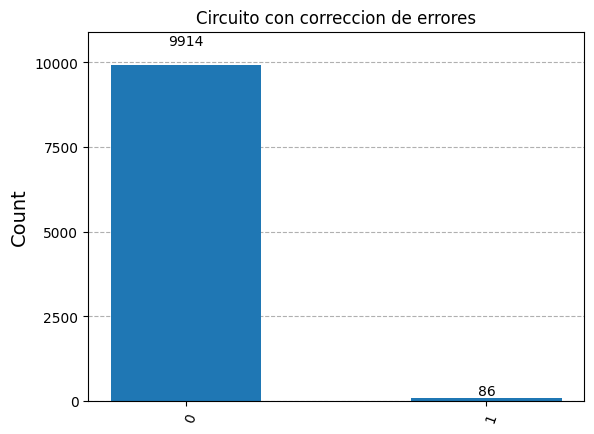

In [8]:
# Histograma para circuito qc_corrected (Debería ser similar al anterior si el proceso de correción fue exitoso)
plot_histogram(pub_result_corrected.data.physical_bits.get_counts(), title="Circuito con correccion de errores")

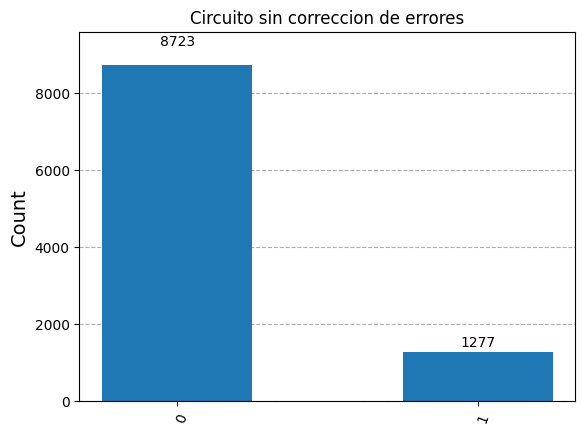

In [9]:
# Histograma para circuito qc_error
plot_histogram(pub_result_error.data.physical_bits.get_counts(), title="Circuito sin correccion de errores")

### Prueba 2:

Hacemos el mismo experimento, pero ahora con $E_i$ definida cómo una rotación generica de un qubit con los 3 ángulos de Euler, $U(\theta, \phi, \lambda)$:

$$E_i = U(\theta_i, \phi_i, \lambda_i) = \left( \begin{matrix}
\text{cos}(\frac{\theta_i}{2}) & -e^{i\lambda_i}\text{sin}(\frac{\theta_i}{2}) \\
e^{i\phi_i}\text{sin}(\frac{\theta_i}{2}) & e^{i(\phi_i + \lambda_i)}\text{cos}(\frac{\theta_i}{2})
\end{matrix} \right)$$

Para esto definimos $\textcolor{Orange}{\text{Max\_theta}}$, $\textcolor{Orange}{\text{Max\_phi}}$ y $\textcolor{Orange}{\text{Max\_lambda}}$ y los correspondientes vectores aleatoreos de 7 elementos, tal cómo en la prueba 1. En esta prueba tomamos:

- $\textcolor{Orange}{\text{Max\_theta}} = 0.5$
- $\textcolor{Orange}{\text{Max\_phi}} = 0.5$
- $\textcolor{Orange}{\text{Max\_lambda}} = 0.5$ 

In [10]:
# Definimos los tres vectores aleatoreos
max_theta, theta_vector = 0.5, []
max_phi, phi_vector = 0.5, []
max_lambda, lambda_vector = 0.5, []


for i in range(7):
    theta = np.random.uniform(-max_theta, max_theta)
    phi = np.random.uniform(-max_phi, max_phi)
    lambda_ = np.random.uniform(-max_lambda, max_lambda)
    
    theta_vector.append(theta)
    phi_vector.append(phi)
    lambda_vector.append(lambda_)

# Imprimimos uno de los vectores aleatoreso
phi_vector

[0.289946674826306,
 -0.264829566765572,
 0.2808070551183063,
 -0.24388114007064743,
 -0.2414131174941858,
 0.20874695246664776,
 0.33025304866960914]

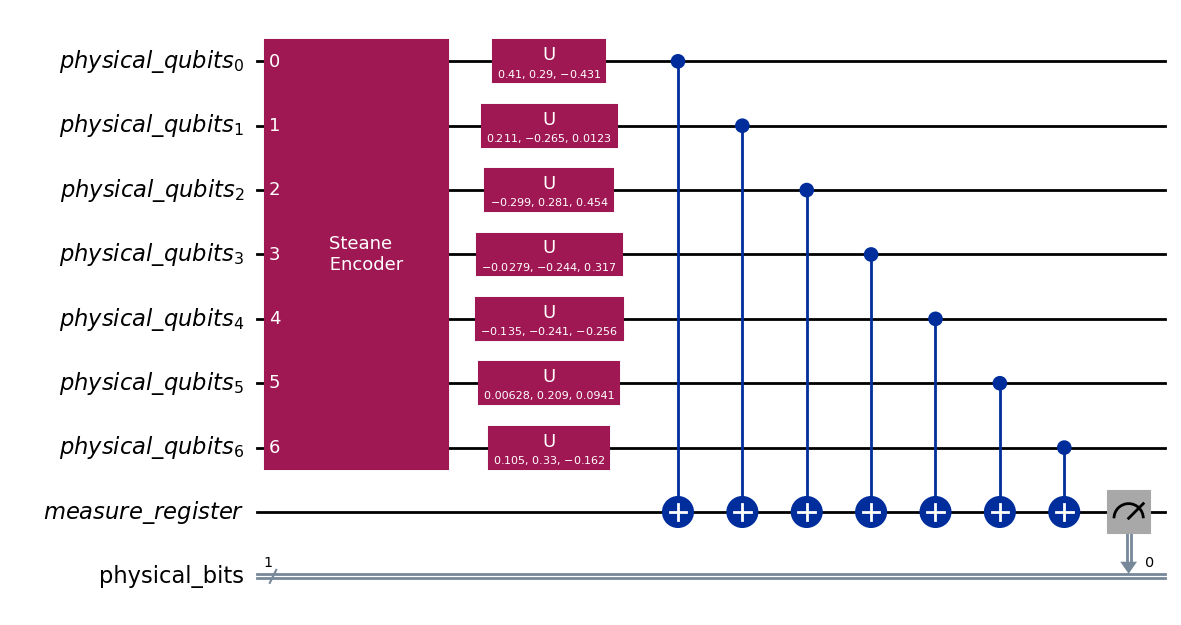

In [11]:
# Generamos el código sin corregir error
qc_error_steane_circuit = SteaneCodeCircuit(logical_qubit_count=1)
qc_error_steane_circuit.encode()

for i in range(qc_error_steane_circuit.physical_qubit_count):
    qc_error_steane_circuit.append_unitary_error(UGate(theta_vector[i], phi_vector[i], lambda_vector[i]), i)

qc_error_steane_circuit.measure_all()
qc_error_steane_circuit.draw_physical_circuit()

In [12]:
qc_error = qc_error_steane_circuit.physical_quantum_circuit

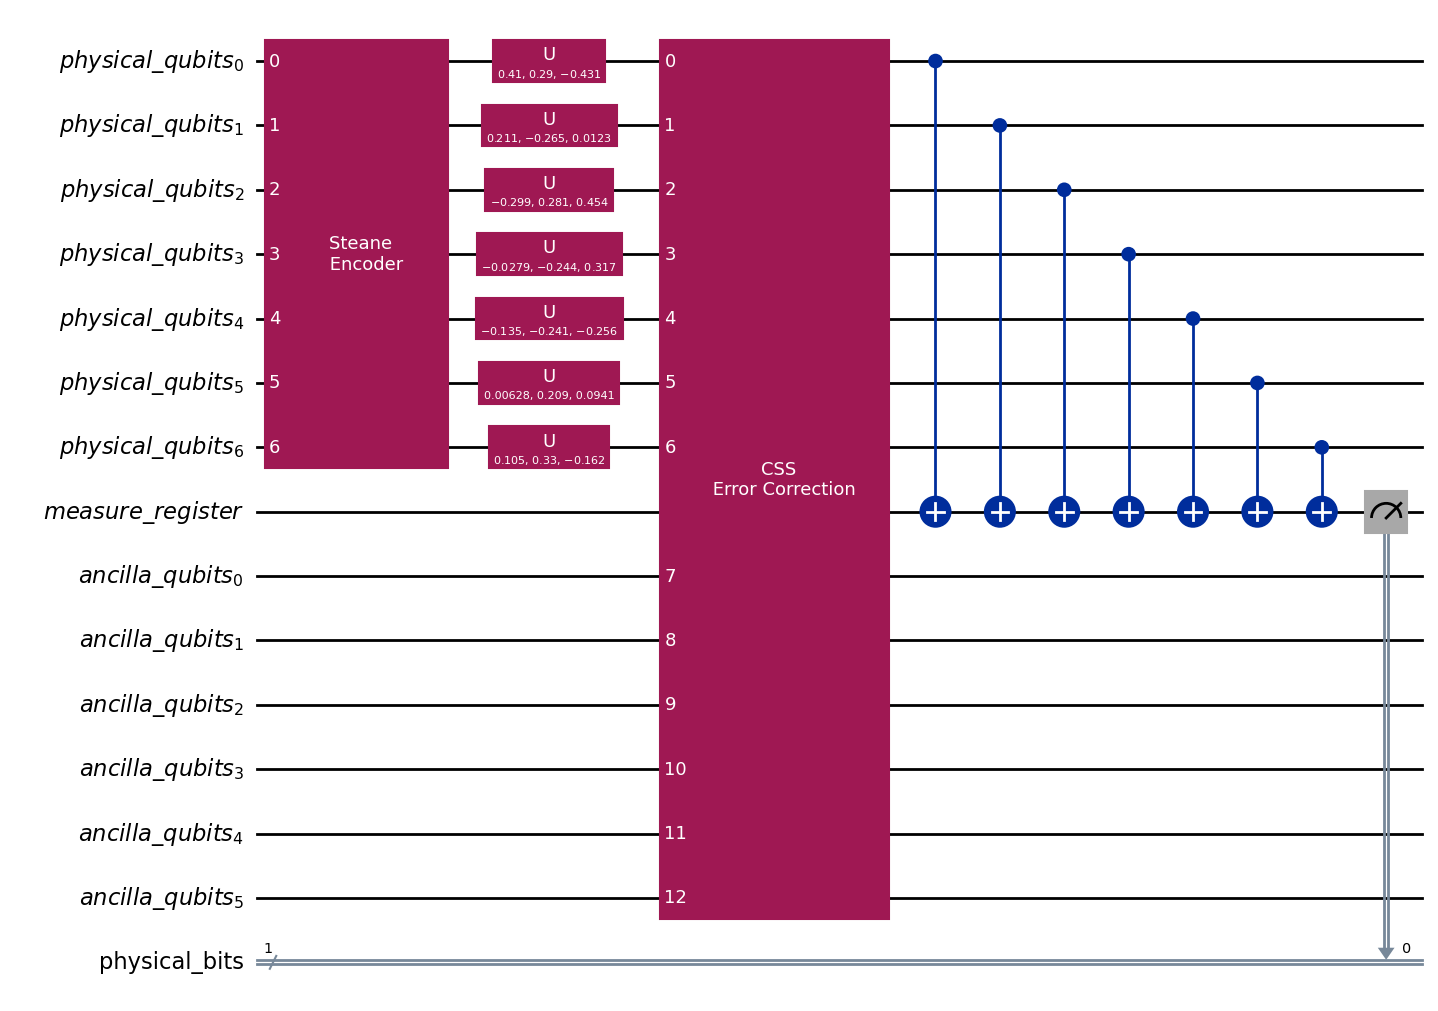

In [13]:
# Generamos el código sin corregir error y el código Lógico
qc_corrected_steane_code = SteaneCodeCircuit(logical_qubit_count=1)
qc_corrected_steane_code.encode()
for i in range(qc_corrected_steane_code.physical_qubit_count):
    qc_corrected_steane_code.append_unitary_error(UGate(theta_vector[i], phi_vector[i], lambda_vector[i]), i)

qc_corrected_steane_code.correct()
qc_corrected_steane_code.measure_all()

qc_corrected_steane_code.draw_physical_circuit()

In [14]:
qc_corrected = qc_corrected_steane_code.physical_quantum_circuit

In [15]:
shots = 10000 
sampler = StatevectorSampler()

pub_corrected = (qc_corrected, None, shots)
pub_error = (qc_error, None, shots)

job = sampler.run([pub_corrected, pub_error])


pub_result_corrected = job.result()[0]
pub_result_error = job.result()[1]

print(f" > Resultados sin corregir error {pub_result_error.data.physical_bits.get_counts()}")
print(f" > Resultados corrigiendo error {pub_result_corrected.data.physical_bits.get_counts()}")

 > Resultados sin corregir error {'1': 787, '0': 9213}
 > Resultados corrigiendo error {'0': 9981, '1': 19}


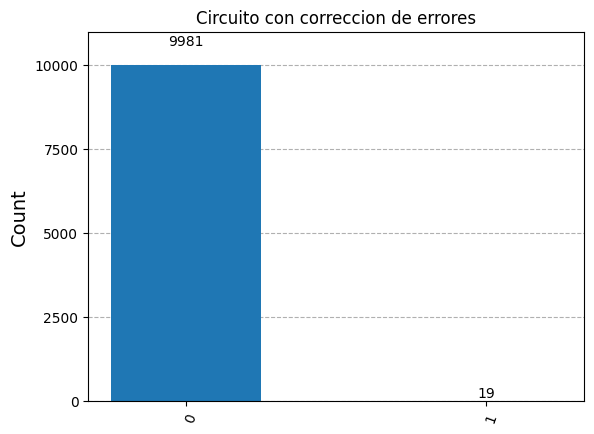

In [16]:
# Histograma para circuito qc_corrected (Debería ser similar al anterior si el proceso de correción fue exitoso)
plot_histogram(pub_result_corrected.data.physical_bits.get_counts(), title="Circuito con correccion de errores")

In [17]:
# Histograma para circuito qc_error
plot_histogram(pub_result_error.data.physical_bits.get_counts(), title="Circuito sin correccion de errores")
pub_result_error.data.physical_bits.get_counts()['0']

9213

### Prueba 3:

Ahora hacemos el mismo experimento que en **Prueba 2** pero evaluando la tasa de error en cada cada terna $(\theta, \phi, \lambda)$ para los ángulos en el .csv $\textcolor{orange}{\text{small\_errors.csv}}$. Es decir, tomamos $U(\theta, \phi, \lambda)$ y creamos un circuito con el error:

$$E = U(\theta, \phi, \lambda)^{\otimes 7}$$

El archivo $\textcolor{orange}{\text{small\_errors.csv}}$ contiene 1000 ternas $\theta, \phi, \lambda$, generadas a partir de una distribución uniforme entre $-0.5$ y $0.5$, junto con la fidelidad con  $F(\ket{0}, U(\theta, \phi, \lambda)\ket{0})$ y la norma matricial (de Fobenious) de $I - U(\theta, \phi, \lambda)$ para cada terna.

In [18]:
# Cargamos el csv en un dataset:
angles = pd.read_csv("../quantum-codes/datasets/small_errors.csv")
angles[:10]

,theta,phi,lambda,fidelity,norm,diamond_norm
0,-0.336824,-0.098229,0.425601,0.971905,0.401630,0.464346
1,0.087779,-0.024730,-0.370625,0.998075,0.397471,0.402097
2,0.240714,-0.106085,0.133960,0.985584,0.172360,0.241722
3,0.194436,0.106431,0.395025,0.990578,0.513768,0.530661
4,0.493888,0.271036,-0.320655,0.940248,0.351754,0.491246
5,-0.420773,-0.011928,0.261865,0.956387,0.385971,0.483621
6,-0.139047,-0.294184,-0.493051,0.995174,0.772418,0.777722
7,0.031422,0.118403,-0.010503,0.999753,0.110106,0.112319
8,0.453829,-0.408969,0.486115,0.949387,0.329144,0.456179
9,0.035316,-0.407320,0.494609,0.999688,0.090758,0.094124


In [19]:
angles.shape[0] # Podemos obtener las dimensiones del dataframe de esta forma

1000

In [20]:
error_rate_corrected = np.zeros(angles.shape[0])
error_rate_error = np.zeros(angles.shape[0])
shots = 1000 
expected_value = '0'

for index, row in angles.iterrows():

    # El proceso es lento. Agregamos una linea de avance
    if(index % 10 == 0):
        print(f"Avance {index}/{angles.shape[0]}", end="\r")

    # Generamos el circuitio con corrección de errores:
    qc_corrected_steane_code = SteaneCodeCircuit(logical_qubit_count=1)
    qc_corrected_steane_code.encode()
    for i in range(qc_corrected_steane_code.physical_qubit_count):
        qc_corrected_steane_code.append_unitary_error(UGate(row['theta'], row['phi'], row['lambda']), i)

    qc_corrected_steane_code.correct()
    qc_corrected_steane_code.measure_all()


    # Generamos el circuito sin corrección de errores:
    qc_error_steane_circuit = SteaneCodeCircuit(logical_qubit_count=1)
    qc_error_steane_circuit.encode()

    for i in range(qc_error_steane_circuit.physical_qubit_count):
        qc_error_steane_circuit.append_unitary_error(UGate(row['theta'], row['phi'], row['lambda']), i)

    qc_error_steane_circuit.measure_all()


    # Extraemos ambos circuitos y los corremos:
    qc_corrected = qc_corrected_steane_code.physical_quantum_circuit
    qc_error = qc_error_steane_circuit.physical_quantum_circuit

    sampler = StatevectorSampler()

    pub_corrected = (qc_corrected, None, shots)
    pub_error = (qc_error, None, shots)

    job = sampler.run([pub_corrected, pub_error])

    pub_result_corrected = job.result()[0]
    pub_result_error = job.result()[1]


    # Calculamos el error rate para los dos circuitos
    error_rate_error[index] = 1 - pub_result_error.data.physical_bits.get_counts()[expected_value]/shots # Error rate
    error_rate_corrected[index] = 1 - pub_result_corrected.data.physical_bits.get_counts()[expected_value]/shots 

print(f"Avance {angles.shape[0]}/{angles.shape[0]}", end="\r")


In [21]:
print(f" > Tasa de error promedio sin correccion de errores: {np.mean(error_rate_error)}")
print(f" > Tasa de error promedio con correccion de errores: {np.mean(error_rate_corrected)}")

 > Tasa de error promedio sin correccion de errores: 0.08862900000000001
 > Tasa de error promedio con correccion de errores: 0.03152100000000001


In [22]:
# Dajamos los resultados en un dataframe
error_rate = pd.DataFrame({'error_correction': error_rate_corrected, 'whitout_error_correction': error_rate_error})
error_rate[:20]

,error_correction,whitout_error_correction
0,0.033,0.144
1,0.000,0.010
2,0.014,0.089
3,0.004,0.058
4,0.112,0.188
5,0.089,0.178
6,0.001,0.039
7,0.000,0.005
8,0.092,0.206
9,0.000,0.002


**Gráficas:**

Se puede demostrar que, en este caso donde se compara la fidelidad con el estado $\ket{0}$, $\text{Fidelidad} = \text{cos}^{2}\left(\frac{\theta}{2}\right)$. Cómo se ve en las gráficas, en este caso la fidelidad influye mucho en la tasa de error, por tanto también $\theta$ tiene influencia en la tasa de error. 

No se ve ninguna relación entre $\phi$ y $\lambda$ con la tasa de error. Si se ve una relación entre la norma de Frobenious $||I - U(\theta, \phi, \lambda)||_{F}$ y la tasa de error pero mucho menos marcada al comparar con la fidelidad. 

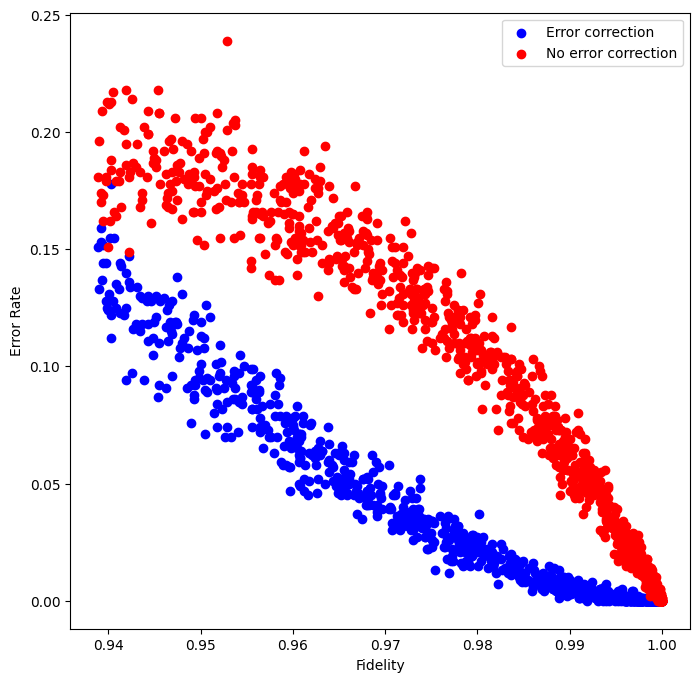

In [35]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(angles['fidelity'],
error_rate['error_correction'], c='blue', label='Error correction')

ax.scatter(angles['fidelity'],
error_rate['whitout_error_correction'], c='red', label='No error correction')
# Set axis labels
ax.set_xlabel("Fidelity")
ax.set_ylabel("Error Rate")

ax.legend()


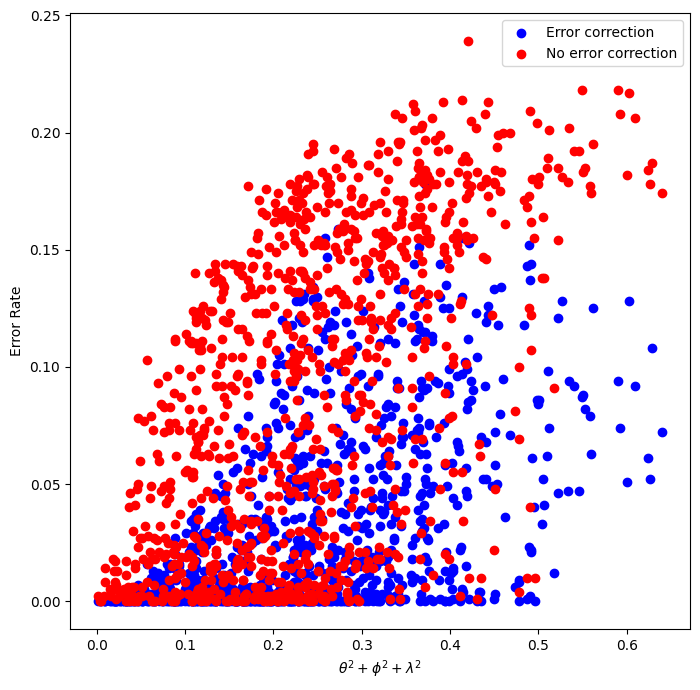

In [36]:
fig, ax = subplots(figsize=(8,8))

x_axis = angles['theta']**2 + angles['phi']**2 + angles['lambda']**2
label_x_axis = "$\\theta^2 + \\phi^2 + \\lambda^2$"

sum_angles = angles['theta']**2 + angles['phi']**2 + angles['lambda']**2

ax.scatter(x_axis,
error_rate['error_correction'], c='blue', label='Error correction')

ax.scatter(x_axis,
error_rate['whitout_error_correction'], c='red', label='No error correction')
# Set axis labels
ax.set_xlabel(label_x_axis)
ax.set_ylabel("Error Rate")

ax.legend()

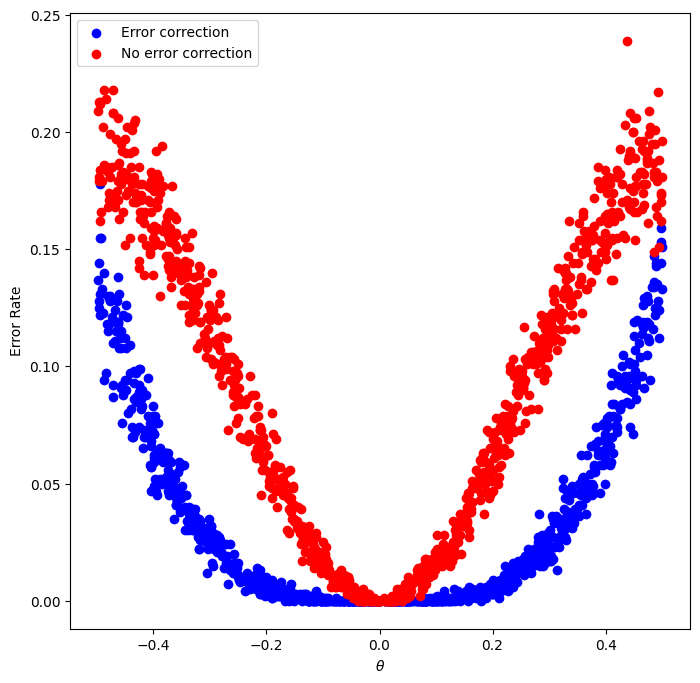

In [37]:
fig, ax = subplots(figsize=(8,8))

x_axis = angles['theta']
label_x_axis = "$\\theta$"

ax.scatter(x_axis,
error_rate['error_correction'], c='blue', label='Error correction')

ax.scatter(x_axis,
error_rate['whitout_error_correction'], c='red', label='No error correction')
# Set axis labels
ax.set_xlabel(label_x_axis)
ax.set_ylabel("Error Rate")

ax.legend()

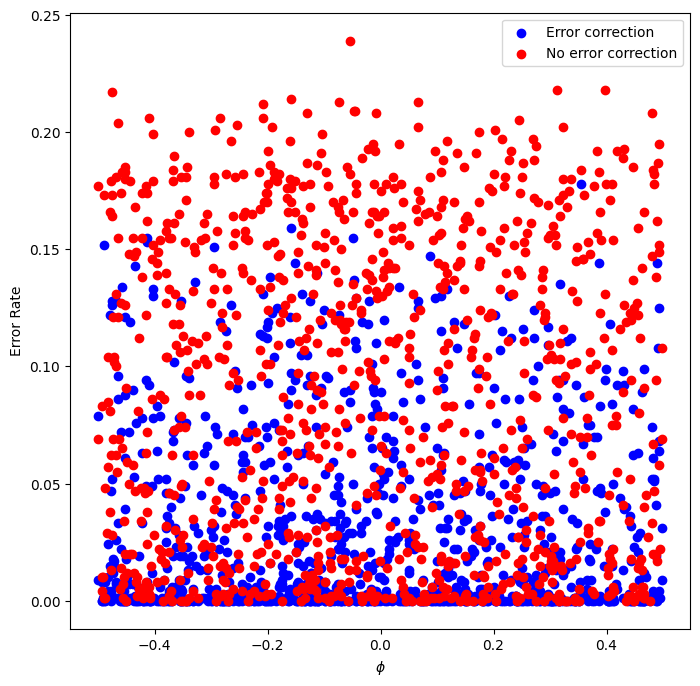

In [26]:
fig, ax = subplots(figsize=(8,8))

x_axis = angles['phi']
label_x_axis = "$\\phi$"

ax.scatter(x_axis,
error_rate['error_correction'], c='blue', label='Error correction')

ax.scatter(x_axis,
error_rate['whitout_error_correction'], c='red', label='No error correction')
# Set axis labels
ax.set_xlabel(label_x_axis)
ax.set_ylabel("Error Rate")

ax.legend()

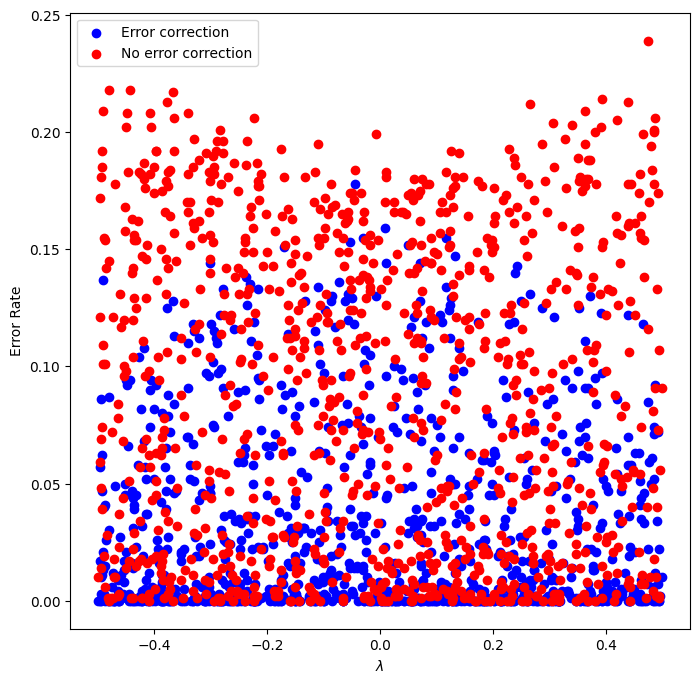

In [27]:
fig, ax = subplots(figsize=(8,8))

x_axis = angles['lambda']
label_x_axis = "$\\lambda$"

ax.scatter(x_axis,
error_rate['error_correction'], c='blue', label='Error correction')

ax.scatter(x_axis,
error_rate['whitout_error_correction'], c='red', label='No error correction')
# Set axis labels
ax.set_xlabel(label_x_axis)
ax.set_ylabel("Error Rate")

ax.legend()

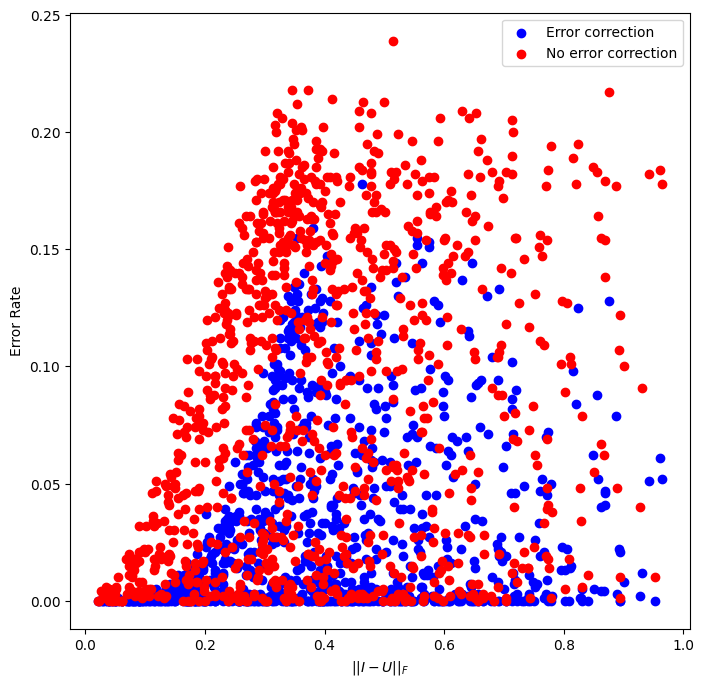

In [28]:
fig, ax = subplots(figsize=(8,8))

x_axis = angles['norm']
label_x_axis = "$||I - U||_{F}$"

ax.scatter(x_axis,
error_rate['error_correction'], c='blue', label='Error correction')

ax.scatter(x_axis,
error_rate['whitout_error_correction'], c='red', label='No error correction')
# Set axis labels
ax.set_xlabel(label_x_axis)
ax.set_ylabel("Error Rate")

ax.legend()

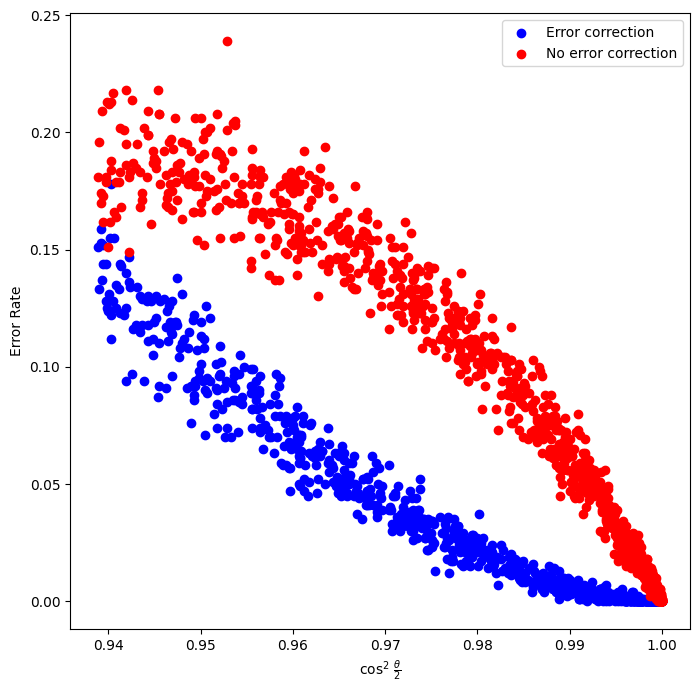

In [29]:
fig, ax = subplots(figsize=(8,8))

x_axis = np.cos(angles['theta']/2)**2
label_x_axis = "$\\text{cos}^2$ $\\frac{\\theta}{2}$"

ax.scatter(x_axis,
error_rate['error_correction'], c='blue', label='Error correction')

ax.scatter(x_axis,
error_rate['whitout_error_correction'], c='red', label='No error correction')
# Set axis labels
ax.set_xlabel(label_x_axis)
ax.set_ylabel("Error Rate")

ax.legend()

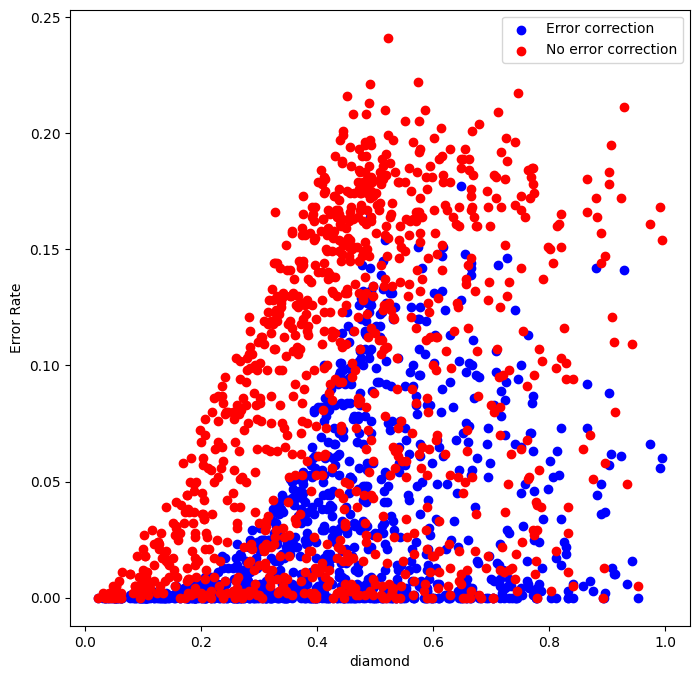

In [188]:
threshold = -1
variable = 'theta'

ds = angles.where(angles[variable] > threshold).dropna()
er = error_rate.where(angles[variable] > threshold).dropna()

fig, ax = subplots(figsize=(8,8))

x_axis = ds['diamond_norm']
y_error = er['whitout_error_correction']
y_corrected = er['error_correction']
label_x_axis = "diamond"

ax.scatter(x_axis,
y_corrected, c='blue', label='Error correction')

ax.scatter(x_axis,
y_error, c='red', label='No error correction')
# Set axis labels
ax.set_xlabel(label_x_axis)
ax.set_ylabel("Error Rate")

ax.legend()